In [4]:
from scipy import sparse
import sklearn
import numpy as np
import pandas as pd
import mglearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print('keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print('target names: \n{}'.format(iris_dataset['target_names']))
print('target: \n{}'.format(iris_dataset['target']))
print('feature names: \n{}'.format(iris_dataset['feature_names']))
print('data: \n{}'.format(iris_dataset['data'][:5]))
print('target: \n{}'.format(iris_dataset['target']))

target names: 
['setosa' 'versicolor' 'virginica']
target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_train type: {}".format(type(X_train)))


X_train shape: (112, 4)
y_train shape: (112,)
y_train type: <class 'numpy.ndarray'>


<class 'numpy.ndarray'>
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


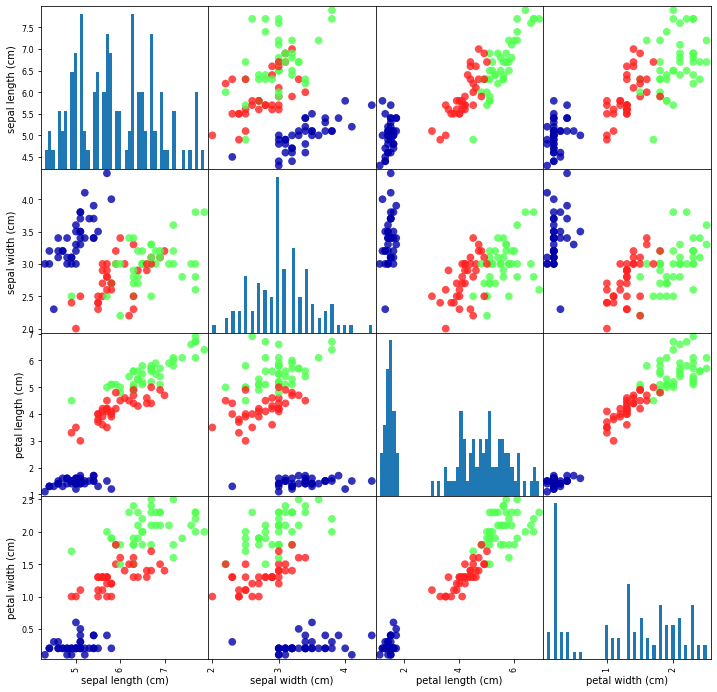

In [11]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
print(type(iris_dataset['data']))
#first convert NumPy array into a pandas DataFrame
#this is bc pandas has a function to create pair plots called 'scatter_matrix'
# the columns of X_train correspond to the feature_names of iris_dataset
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset['feature_names'])
print(iris_dataframe)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, 
                                 figsize=(12,12), marker='o',
                        hist_kwds={'bins':50}, s=60, alpha=.8, 
                                 cmap=mglearn.cm3)
#We see that that the data is well segregated
#thus ML algorithm will most likely distinguish the classes

In [10]:
print(iris_dataframe.var(axis=0))


sepal length (cm)    0.759188
sepal width (cm)     0.190267
petal length (cm)    3.242510
petal width (cm)     0.610627
dtype: float64


In [82]:
#instantiate the class into an object:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [84]:
#new data point, note that X_new is 2-D array as 
#sklearn always expects two-dimensional arrays for the data
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [89]:
prediction = knn.predict(X_new)
print("Prediction: {}".format((prediction)))
print("Prediction target name: {}".format(
    iris_dataset['target_names'][prediction]))


Prediction: [0]
Prediction target name: ['setosa']


In [90]:
#evaluating the model:
y_pred = knn.predict(X_test)
print("Test set predictions: \n{}".format(y_pred))

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [98]:
print("Test set score: {:.5f}".format((np.mean(y_pred == y_test))))
print(sklearn.metrics.accuracy_score(y_pred,y_test))

Test set score: 0.97368
0.9736842105263158
